<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [26]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [27]:
#read file:
file=pd.read_csv('arac.csv',sep=';')
cars=file.loc[:,'Car'].to_numpy()
buses=file.loc[:,'Bus'].to_numpy()

print(cars)
print(buses)

[   91469   112367   125375   137345   137771   153676   187272   240360
   313160   403546   488894   560424   624438   688687   742252   776432
   811465   856350   919577   983444  1087234  1193021  1310257  1434830
  1649879  1864344  2181388  2619852  2861640  3058511  3274156  3570105
  3838288  4072326  4422180  4534803  4600140  4700343  5400440  5772745
  6140992  6472156  6796629  7093964  7544871  8113111  8648875  9283923
  9857915 10509258]
[ 12041  13332  13948  15529  15980  17140  18504  20011  21404  23763
  25388  27096  28559  30634  32783  33839  35432  38478  43638  47119
  50798  53554  56172  58859  63700  68973  75592  84254  87545  90197
  94978 101896 108361 112186 118454 119306 120097 123500 152712 163390
 175949 189128 199934 201033 208510 219906 235949 219885 211200 216566]


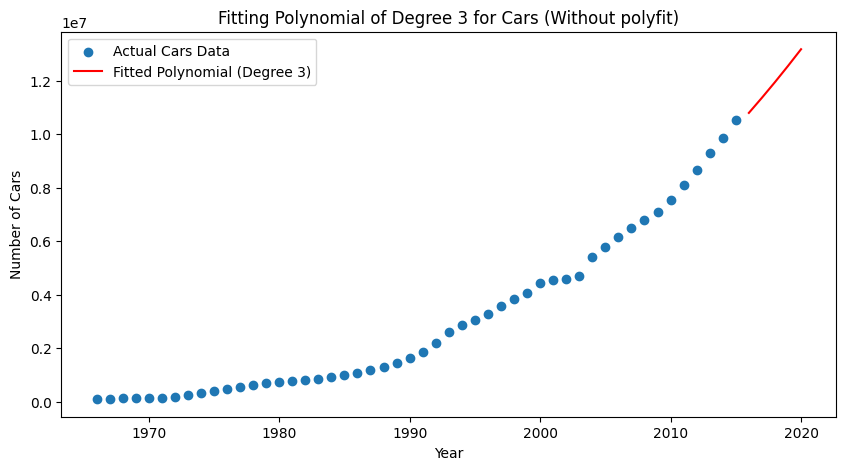

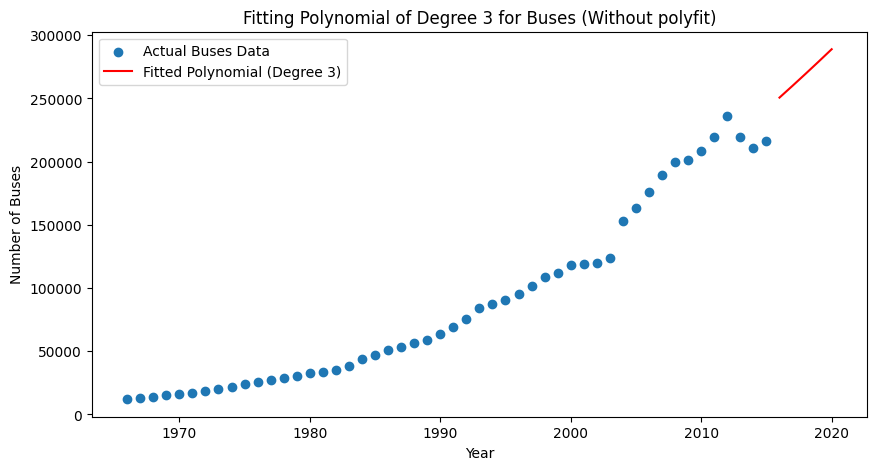

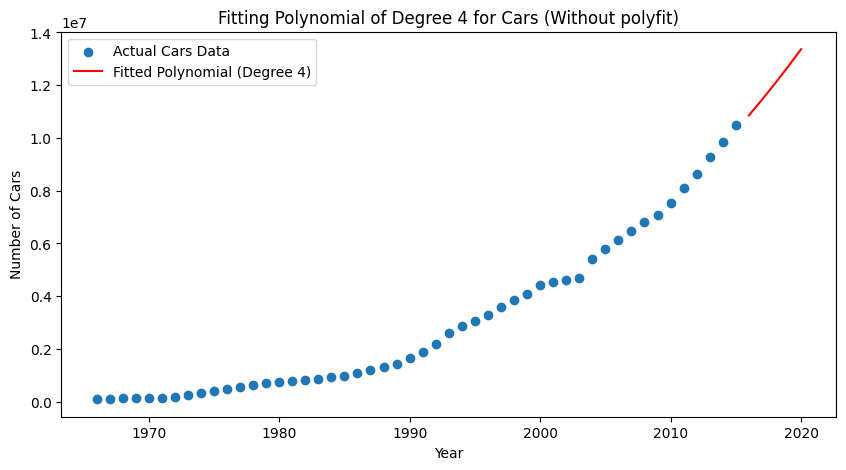

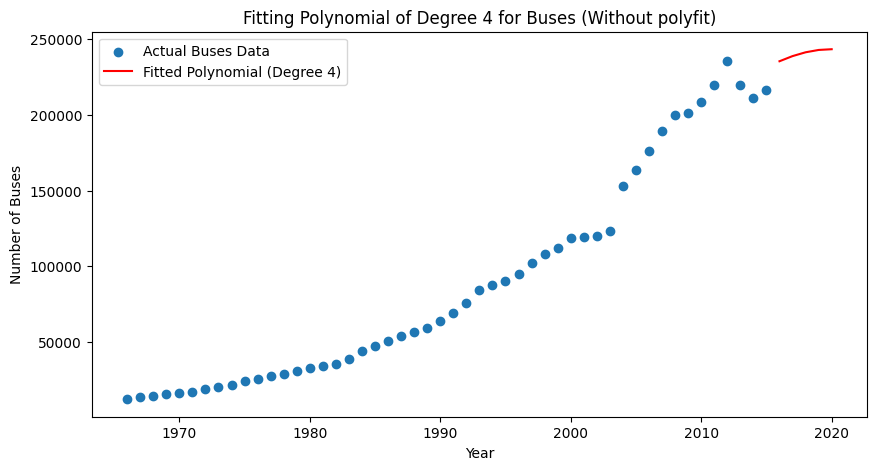

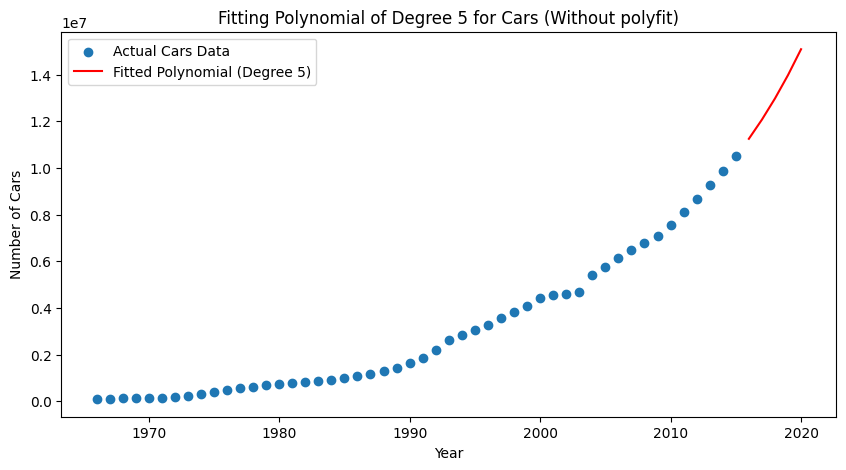

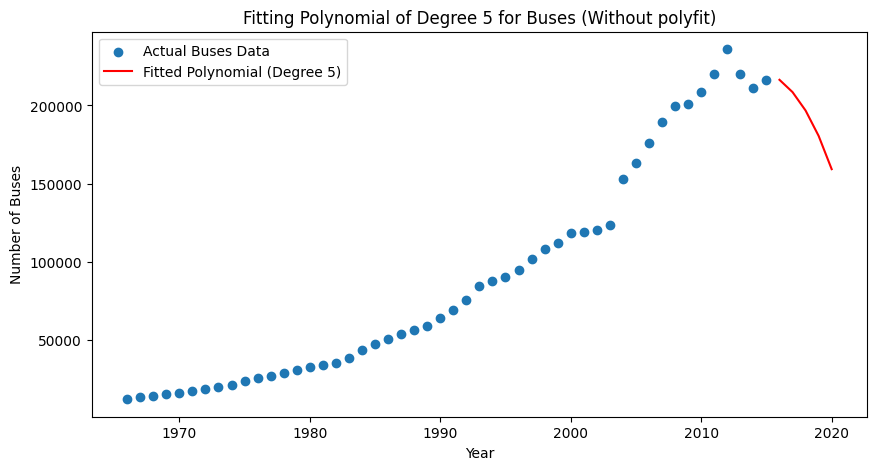

In [103]:
years = np.array([2016, 2017, 2018, 2019, 2020])
existed_years= np.arange(1966, 2015 + 1)
fullyears = np.arange(1966, 2020 + 1)

# Function to fit a polynomial of degree K without using polyfit
def fit_polynomial_manual(x, y, degree):
    n = len(x)
    
    # Creating the matrix manually
    X = np.zeros((n, degree + 1))
    for i in range(degree + 1):
        X[:, i] = x ** i
    
    # Solving the normal equations using pseudo-inverse
    coefficients = np.dot(np.linalg.pinv(X), y)
    
    # Creating the polynomial function
    polynomial = np.poly1d(coefficients[::-1])  # Coefficients need to be reversed
    
    return polynomial

# Plot the data and model fit for each degree
degrees = [3, 4, 5]

for degree in degrees:
    # Fit polynomial for Cars
    cars_polynomial = fit_polynomial_manual(existed_years-1966, cars, degree)

    # Fit polynomial for Buses
    buses_polynomial = fit_polynomial_manual(existed_years-1966, buses, degree)

    # Plot Cars
    plt.figure(figsize=(10, 5))
    plt.scatter(existed_years, cars, label='Actual Cars Data')
    plt.plot(years, cars_polynomial(years-1966), label=f'Fitted Polynomial (Degree {degree})', color='red')
    plt.title(f'Fitting Polynomial of Degree {degree} for Cars (Without polyfit)')
    plt.xlabel('Year')
    plt.ylabel('Number of Cars')
    plt.legend()
    plt.show()

    # Plot Buses
    plt.figure(figsize=(10, 5))
    plt.scatter(existed_years, buses, label='Actual Buses Data')
    plt.plot(years, buses_polynomial(years-1966), label=f'Fitted Polynomial (Degree {degree})', color='red')
    plt.title(f'Fitting Polynomial of Degree {degree} for Buses (Without polyfit)')
    plt.xlabel('Year')
    plt.ylabel('Number of Buses')
    plt.legend()
    plt.show()





## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [535]:
def load_data(file_name):
    #Load the data from the CSV file
    data = np.genfromtxt(file_name, delimiter=',')

    # Extract the columns 'x' and 'y'
    x_values = data[:, 0]
    y_values = data[:, 1]

    # Create a 2D matrix X
    X = np.column_stack((x_values, y_values))

    return X

In [536]:
# Example usage:
file_name = 'Image.csv'
X = load_data(file_name)
print(X)

[[ 3.69959867  3.89235252]
 [ 2.6413343   2.97095728]
 [-1.66329434  3.35560306]
 ...
 [ 0.5785215   0.34965446]
 [ 2.6710785   2.30721969]
 [-1.04525337  1.21114529]]


- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [537]:
def kmeans(X, K):
    max_iters=100
    # Randomly initialize cluster centroids from data points
    M = X[np.random.choice(X.shape[0], K, replace=False)]

    for _ in range(max_iters):
        # Step 1: Assign data points to the nearest cluster centroid using LSE
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        U = np.argmin(distances, axis=1)

        # Step 2: Update cluster centroids based on the mean of assigned data points (LSE)
        M = np.array([np.mean(X[U == k], axis=0) for k in range(K)])

    return M, U

In [538]:
# Example usage:
file_name = 'Image.csv'
X = load_data(file_name)

# Set the number of clusters (K)
K = 3

# Apply K-means clustering
M, U = kmeans(X, K)

# Print the cluster centroids and assignments
print("Cluster Centroids:")
print(M)
print("\nCluster Assignments:")
print(U)

Cluster Centroids:
[[ 3.18586944  3.06155446]
 [-0.07057305  0.02795606]
 [-2.13711914  4.12519435]]

Cluster Assignments:
[0 0 2 2 1 2 2 2 2 2 1 1 2 0 2 1 1 1 1 0 2 1 2 1 1 1 2 0 2 2 2 2 1 0 1 2 2
 2 1 2 1 2 1 2 0 2 0 1 0 2 0 2 2 0 2 1 2 0 0 1 2 0 1 0 2 1 1 2 2 0 1 2 0 0
 0 0 2 0 0 1 0 0 0 0 1 2 2 1 2 0 2 2 1 2 1 0 1 0 2 1 0 2 0 1 2 1 2 0 0 2 1
 0 1 0 2 0 2 2 0 2 0 1 1 0 2 0 2 2 0 2 1 1 2 0 0 1 1 1 0 2 0 0 0 2 1 1 2 0
 0 1 0 2 2 1 1 2 1 1 2 2 1 0 2 2 1 2 0 1 0 2 2 2 2 2 0 1 2 2 0 0 1 1 2 1 0
 2 1 1 1 2 1 0 2 2 1 1 2 2 2 0 1 0 0 1 2 1 1 1 0 0 2 0 1 1 1 0 2 1 0 0 1 0
 1 2 1 2 0 1 0 1 2 1 0 0 1 0 2 2 1 2 0 0 0 1 1 2 2 2 1 1 1 1 1 1 2 1 1 0 2
 1 2 0 0 1 2 1 1 2 2 0 0 0 0 1 2 2 1 2 0 0 1 0 0 0 2 1 2 2 1 1 1 2 1 2 0 2
 0 1 2 1 2 0 2 0 2 1 0 2 1 2 1 1 2 2 0 2 1 0 1 1 2 1 2 0 2 1 0 2 0 2 1 1 1
 1 0 0 1 1 2 1 0 0 1 0 2 0 0 2 1 0 2 0 1 1 0 1 1 2 1 0 0 0 0 1 2 0 1 0 1 1
 0 1 0 2 2 0 0 0 0 2 1 0 1 0 1 1 0 1 1 0 2 1 1 0 0 2 2 2 2 2 0 1 1 0 0 1 0
 1 2 0 0 1 0 1 1 2 2 2 1 0 2 2 1 0 0 0 0 1 1 0 0 1 0

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [539]:
def plot_clusters(X, M, U):
    # Get the number of clusters (K)
    K = M.shape[0]

    # Plot data points
    for k in range(K):
        cluster_points = X[U == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')

    # Plot cluster centroids with circles
    for k in range(K):
        plt.scatter(M[k, 0], M[k, 1], marker='o', s=200, facecolors='none', edgecolors='black', linewidth=2)
        circle = plt.Circle((M[k, 0], M[k, 1]), radius=np.max(np.linalg.norm(cluster_points - M[k], axis=1)), fill=False, color='black', linestyle='dotted')
        plt.gca().add_patch(circle)

    # Label the axes
    plt.xlabel('x')
    plt.ylabel('y')

    # Add title and legend
    plt.title('K-means Clustering')
    plt.legend()

    # Show the plot
    plt.show()

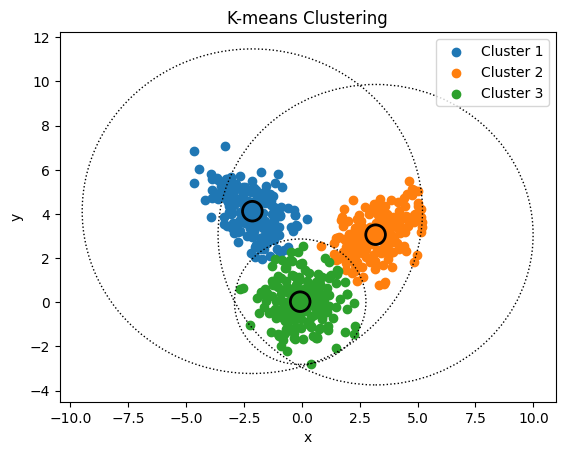

In [540]:
# Example usage:
file_name = 'Image.csv'
X = load_data(file_name)

# Set the number of clusters (K)
K = 3

# Apply K-means clustering
M, U = kmeans(X, K)

# Plot clusters
plot_clusters(X, M, U)

**<font color="red"> Don't edit the code in the following cell!</font>**

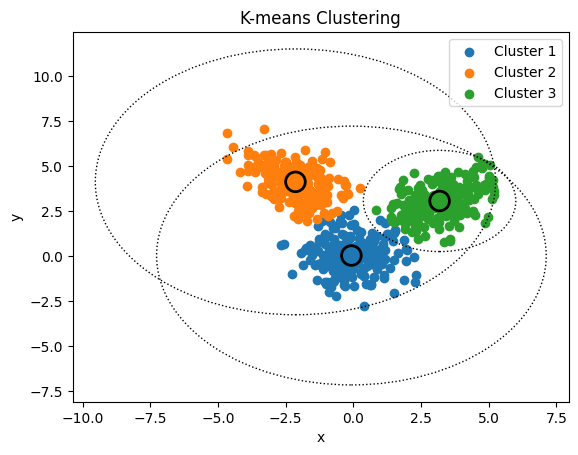

In [541]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

In [542]:
def elbow_method(X, K_list):
      # Calculate SSE for each value of K
    S = []
    for K in possible_K_values:
        M, U = kmeans(X, K)
        distances = np.linalg.norm(X[:, np.newaxis, :] - M, axis=2)
        SSE = np.sum(np.min(distances, axis=1)**2)
        S.append(SSE)

    # Plot S versus K
    plt.plot(possible_K_values, S, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K')
    plt.show()
    S=np.array(S)
    return S

# the rest of the code...

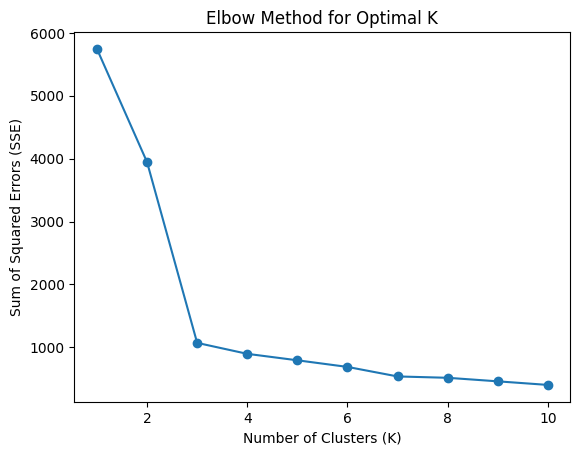

SSE Values:
[5744.40265041 3944.67609537 1070.76158904  896.56795508  793.76605029
  688.61876497  537.14295789  515.59069506  459.33167825  402.29463254]


In [543]:
# Example usage:
file_name = 'Image.csv'
X = load_data(file_name)

# Specify a range of possible values for K
possible_K_values = range(1, 11)

# Apply elbow method
SSE_values = elbow_method(X, possible_K_values)

# Print the SSE values for analysis
print("SSE Values:")
print(SSE_values)

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [544]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [545]:
# Load the dataset
df = pd.read_csv('sentiment.csv')

In [546]:
# 1. Display the first 25 rows 
print("First 25 rows:")
print(df.head(25))

First 25 rows:
    PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12           1             

In [547]:
# TODO: Last 10 rows of the dataset
print("\nLast 10 rows:")
print(df.tail(10))


Last 10 rows:
      PhraseId  SentenceId                                             Phrase  \
9990      9991         419                     this a comedy or serious drama   
9991      9992         419                          a comedy or serious drama   
9992      9993         419                                        a comedy or   
9993      9994         419                                           a comedy   
9994      9995         419                                      serious drama   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000         420                                   corny television   

      Sentiment  
9990          2  
9991          2  
9992          2  
9993          2  
999

In [558]:
# TODO: information of columns 
# 2. Print information about all columns of the data frame
print("\nInformation about columns:")
print(df.describe())


Information about columns:
          PhraseId    SentenceId     Sentiment
count  10000.00000  10000.000000  10000.000000
mean    5000.50000    200.162500      2.044100
std     2886.89568    121.775362      0.833681
min        1.00000      1.000000      0.000000
25%     2500.75000     95.000000      2.000000
50%     5000.50000    195.000000      2.000000
75%     7500.25000    304.000000      2.000000
max    10000.00000    420.000000      4.000000


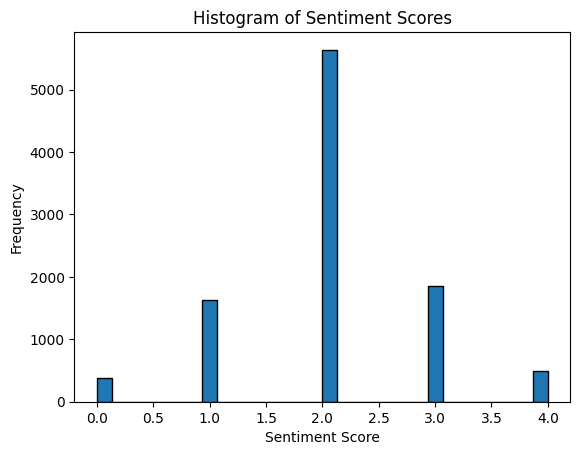

In [559]:
# TODO: histogram of sentiment scores
# 3. Plot the histogram of sentiment scores
plt.hist(df['Sentiment'], bins=30, edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [569]:
def preprocess_text(text):
    
    # 1. Convert all text and words into lowercase
    text = text.lower()
    
    # 2. Removing punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    
    # 3. Creating a list of stop-words
    stop_words = set(stopwords.words('english'))
    
    # 4. Break down the text into individual words or tokens
    tokens = text.split()

    # Remove stop words
    filtered_tokens= [word for word in tokens if word not in stop_words]

    text = ' '.join(filtered_tokens)
    
    return text

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [592]:
# Example usage:
sample_text = df['Phrase']
preprocessed_sample = preprocess_text(sample_text[0])
print("Original Text:", sample_text[0])
print("Preprocessed Text:", preprocessed_sample)

Original Text: series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
Preprocessed Text: series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story


In [593]:
# TODO: Apply the preprocessing function to the text column
df['Phrase'] = df['Phrase'].apply(preprocess_text)

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

The bag-of-words (BoW) model is a text representation technique used in natural language processing and information retrieval. It represents text as an unordered collection of words, disregarding word order but capturing word frequency. This model is commonly employed in document classification, where word occurrences are used as features for training classifiers.

In the context of the BoW model, each document is represented as a set of words along with their respective frequencies. For example, considering two text documents:
(1) Cats are adorable pets. People love their furry companions.
(2) Dogs are loyal and friendly animals. They make great friends.

The BoW representation for each document is constructed as follows:

Document 1:
{"Cats": 1, "are": 1, "adorable": 1, "pets": 1, "People": 1, "love": 1, "their": 1, "furry": 1, "companions": 1}

Document 2:
{"Dogs": 1, "are": 1, "loyal": 1, "and": 1, "friendly": 1, "animals": 1, "They": 1, "make": 1, "great": 1, "friends": 1}

Just like in the previous example, the order of elements within the JSON object is irrelevant. For instance, the order {"furry": 1, "companions": 1, "People": 1, "love": 1, "Cats": 1, "adorable": 1, "are": 1, "pets": 1, "their": 1} is equivalent to the BoW representation of Document 1.

When combining these documents, the resulting BoW representation is the union of the individual representations, summing the multiplicities of each element:

Combined Document:
{"Cats": 1, "are": 2, "adorable": 1, "pets": 1, "People": 1, "love": 1, "their": 1, "furry": 1, "companions": 1, "Dogs": 1, "loyal": 1, "and": 1, "friendly": 1, "animals": 1, "They": 1, "make": 1, "great": 1, "friends": 1}

This approach allows for a mathematical representation of text documents that captures the frequency of words and can be used in various natural language processing applications.

In [622]:
# TODO: Extract features from the preprocessed text data

from sklearn.feature_extraction.text import CountVectorizer

# فرض کنید df DataFrame شماست و 'Phrase' نام ستون متنی است که می‌خواهید ویژگی‌های آن را استخراج کنید
text_data = df['Phrase']

# ایجاد یک نمونه از CountVectorizer
vectorizer = CountVectorizer()

# یادگیری واژگان و تبدیل داده‌های متنی به بردار ویژگی‌ها
X = vectorizer.fit_transform(text_data)

# X حالا یک ماتریس است که هر سطر آن متناظر با یک داده متنی و هر ستون آن متناظر با یک کلمه در واژگان است.
# مقدار هر المان در این ماتریس، تعداد دفعات ظاهر شدن کلمه متناظر در داده متنی متناظر است.
dense = X.toarray()

# Display the results
print("Feature names (Vocabulary):",vectorizer.get_feature_names_out())
print("Dense array representation:")
print(dense)

Feature names (Vocabulary): ['10' '100' '100minute' ... 'zhuangzhuang' 'zingers' 'zip']
Dense array representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [623]:
# 1.  Split the dataset into training and testing sets
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Make predictions on the testing set
y_pred = model.predict(X_test)

# TODO: Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4124405564367806


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

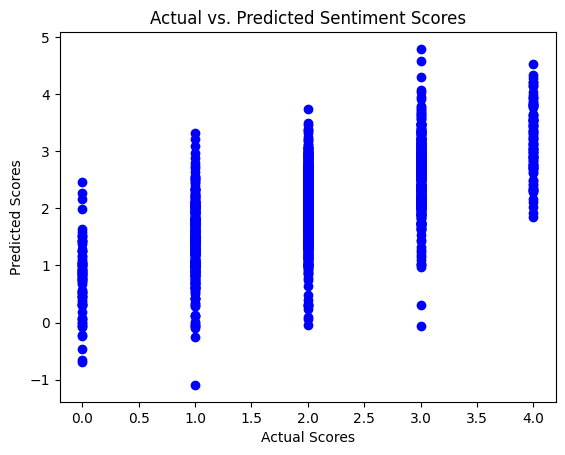

In [624]:
# Actual sentiment scores
actual_scores = y_test

# Predicted sentiment scores
predicted_scores = y_pred

# Scatter plot
plt.scatter(actual_scores, predicted_scores, color='blue')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

## <font color="red"> Discuss the resulted figure </font>
This figure tells us that for example if y_test is 0 our model will predict it somthing betweeen -0.75 to 2.5 but it has more densinty around 0.5.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [625]:
import numpy as np

def create_feature_matrix(texts, vocabulary):
    """
    Create a feature matrix from scratch.

    Parameters:
    - texts: List of text documents.
    - vocabulary: List of unique words (features) to consider.

    Returns:
    - feature_matrix: 2D NumPy array representing the feature matrix.
    """

    # Initialize an empty feature matrix
    feature_matrix = np.zeros((len(texts), len(vocabulary)))

    # Create a dictionary to map each word to its index in the vocabulary
    word_index = {word: index for index, word in enumerate(vocabulary)}

    # Populate the feature matrix based on word occurrences in each document
    for i, text in enumerate(texts):
        for word in text.split():
            if word in word_index:
                feature_matrix[i, word_index[word]] += 1

    return feature_matrix

# Example usage:
texts =df['Phrase']

# Create a vocabulary (list of unique words)
vocabulary = list(set(word for text in texts for word in text.split()))

# Create the feature matrix
feature_matrix = create_feature_matrix(texts, vocabulary)

# Print the feature matrix
print("Feature Matrix:")
print(feature_matrix)


Feature Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
